In [7]:
from rdkit import Chem
from rdkit.Chem import AllChem, Crippen, rdMolDescriptors, QED, Draw
import selfies as sf

# 1. example SELFIES
s = sf.encoder("C1CCCCC1")  # encode SMILES -> SELFIES

print("SELFIES:", s)


SELFIES: [C][C][C][C][C][C][Ring1][=Branch1]


In [8]:
# 2. decode SELFIES -> SMILES
sm = sf.decoder(s)
print("SMILES:", sm)

SMILES: C1CCCCC1


Mol OK: True
logP: 2.3406000000000002
TPSA: 0.0
QED: 0.42231618686094674
Fingerprint length: 2048
MMFF energy: -3.56093354994134


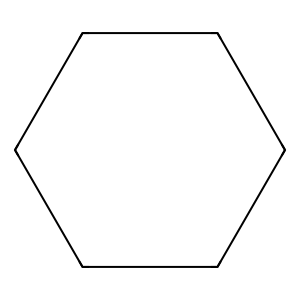

In [9]:
# 3. RDKit molecule
mol = Chem.MolFromSmiles(sm)
print("Mol OK:", mol is not None)

# 4. Sanitize
Chem.SanitizeMol(mol)

# 5. Basic descriptors
print("logP:", Crippen.MolLogP(mol))
# octanol–water partition coefficient (logP), which estimates lipophilicity (how hydrophobic a molecule is)
# higher logP → more lipophilic (less water-soluble)
print("TPSA:", rdMolDescriptors.CalcTPSA(mol))
# Topological Polar Surface Area (TPSA) -> reflects the polar surface of the molecule, mainly from oxygen and nitrogen atoms and their attached hydrogens
# important for drug absorption, permeability, and bioavailability
print("QED:", QED.qed(mol))
# Quantitative Estimate of Drug-likeness (QED)
# scores molecules from 0 to 1 based on multiple properties (like MW, logP, TPSA, H-bond donors/acceptors, rotatable bonds) to indicate how “drug-like” a molecule is

# 6. Fingerprint
fp = Chem.rdFingerprintGenerator.GetMorganGenerator(radius=2).GetFingerprint(mol)
print("Fingerprint length:", len(fp))

# 7. 3D + MMFF
# we need a 3D structure before using MMFF (Merck Molecular Force Field) because:
# MMFF is a force field method that calculates energies and optimizes geometry based on atomic positions in 3D space (bond lengths, angles, torsions, nonbonded interactions)
mol3D = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol3D)
AllChem.MMFFOptimizeMolecule(mol3D)
mmff_props = AllChem.MMFFGetMoleculeProperties(mol3D)
ff = AllChem.MMFFGetMoleculeForceField(mol3D, mmff_props)
print("MMFF energy:", ff.CalcEnergy())

# 8. draw the mol
Draw.MolToImage(mol)